<a href="https://colab.research.google.com/github/MNLepage08/YCNG-288-DevOps/blob/main/DevOps%20-%20Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahoo-fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=27808d24b0e59129411ab6e85e8353f64e64d664647429c4f04353a4ab225e64
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=b983a4063aa64c0b52f60e8e41b7aa5229e679d58ae5e8dbd8ae89f8510ff210
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si
import datetime
import logging
import time
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from functools import reduce

In [5]:
import warnings
warnings.filterwarnings('ignore')

## **Price for each Tickers and dates**

In [6]:
# get list of S&P 500 tickers
sp = si.tickers_sp500()

# pull data for each S&P stock
price_data = {ticker : si.get_data(ticker) for ticker in sp}

In [8]:
combined = reduce(lambda x,y: x.append(y), price_data.values())
combined.head()

,open,high,low,close,adjclose,volume,ticker
1999-11-18,32.546494,35.765381,28.612303,31.473534,26.794756,62546380,A
1999-11-19,30.713518,30.758226,28.478184,28.880545,24.587240,15234146,A
1999-11-22,29.551144,31.473534,28.657009,31.473534,26.794756,6577870,A
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.358873,5975611,A
1999-11-24,28.701717,29.998213,28.612303,29.372318,25.005903,4843231,A


Null values ?

In [9]:
combined.isnull().sum()
# combined=combined[combined['close'].notnull()]
# combined.isnull().values.any()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

## **Lags of close price for each Ticker**

In [10]:
all = pd.DataFrame(columns=['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker', 'lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4'])

for ticker in sp:

  mask = (combined['ticker'] == ticker)
  ticker = combined.loc[mask]

  for lag in range(0,5):
      ticker[f'lag_{lag}'] = ticker['close'].shift(lag)

  all = all.append(ticker)

In [11]:
all.head()

,open,high,low,close,adjclose,volume,ticker,lag_0,lag_1,lag_2,lag_3,lag_4
1999-11-18,32.546494,35.765381,28.612303,31.473534,26.794756,62546380,A,31.473534,NaN,NaN,NaN,NaN
1999-11-19,30.713518,30.758226,28.478184,28.880545,24.587240,15234146,A,28.880545,31.473534,NaN,NaN,NaN
1999-11-22,29.551144,31.473534,28.657009,31.473534,26.794756,6577870,A,31.473534,28.880545,31.473534,NaN,NaN
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.358873,5975611,A,28.612303,31.473534,28.880545,31.473534,NaN
1999-11-24,28.701717,29.998213,28.612303,29.372318,25.005903,4843231,A,29.372318,28.612303,31.473534,28.880545,31.473534


In [12]:
# Just a check for my lag --> done
mask = (all['ticker'] == 'AAPL')
aapl = all.loc[mask]
aapl.head()

,open,high,low,close,adjclose,volume,ticker,lag_0,lag_1,lag_2,lag_3,lag_4
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600,AAPL,0.128348,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800,AAPL,0.121652,0.128348,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000,AAPL,0.112723,0.121652,0.128348,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600,AAPL,0.115513,0.112723,0.121652,0.128348,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600,AAPL,0.118862,0.115513,0.112723,0.121652,0.128348


In [13]:
all['next'] = all['close'].shift(-1)
all.head()

,open,high,low,close,adjclose,volume,ticker,lag_0,lag_1,lag_2,lag_3,lag_4,next
1999-11-18,32.546494,35.765381,28.612303,31.473534,26.794756,62546380,A,31.473534,NaN,NaN,NaN,NaN,28.880545
1999-11-19,30.713518,30.758226,28.478184,28.880545,24.587240,15234146,A,28.880545,31.473534,NaN,NaN,NaN,31.473534
1999-11-22,29.551144,31.473534,28.657009,31.473534,26.794756,6577870,A,31.473534,28.880545,31.473534,NaN,NaN,28.612303
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.358873,5975611,A,28.612303,31.473534,28.880545,31.473534,NaN,29.372318
1999-11-24,28.701717,29.998213,28.612303,29.372318,25.005903,4843231,A,29.372318,28.612303,31.473534,28.880545,31.473534,29.461731


In [14]:
def tagger(row):
    if row['next']<row['lag_0']:
        return 'Sell'
    else:
        return 'Buy'

In [15]:
all['out'] = all.apply(tagger ,axis=1)
all = all[['lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'out']]
all['date'] = all.index
all.head()

,lag_0,lag_1,lag_2,lag_3,lag_4,out,date
1999-11-18,31.473534,NaN,NaN,NaN,NaN,Sell,1999-11-18
1999-11-19,28.880545,31.473534,NaN,NaN,NaN,Buy,1999-11-19
1999-11-22,31.473534,28.880545,31.473534,NaN,NaN,Sell,1999-11-22
1999-11-23,28.612303,31.473534,28.880545,31.473534,NaN,Buy,1999-11-23
1999-11-24,29.372318,28.612303,31.473534,28.880545,31.473534,Buy,1999-11-24


In [16]:
all=all[all['lag_4'].notnull()]

In [17]:
all.isnull().values.any()

False

In [18]:
mask =  (all['date'] <= '2022-09-01')
all = all.loc[mask]
all.tail()

,lag_0,lag_1,lag_2,lag_3,lag_4,out,date
2022-08-26,159.889999,165.529999,162.630005,162.419998,165.039993,Sell,2022-08-26
2022-08-29,157.869995,159.889999,165.529999,162.630005,162.419998,Sell,2022-08-29
2022-08-30,157.080002,157.869995,159.889999,165.529999,162.630005,Sell,2022-08-30
2022-08-31,156.529999,157.080002,157.869995,159.889999,165.529999,Buy,2022-08-31
2022-09-01,159.410004,156.529999,157.080002,157.869995,159.889999,Sell,2022-09-01


## **Train & Test each days of 3 months**

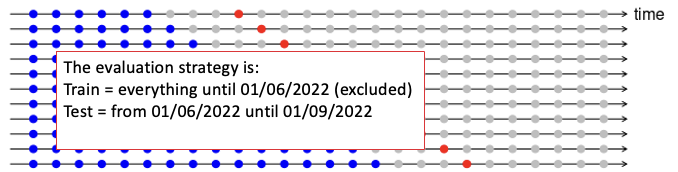

In [23]:
List_Date = all.loc[(all['date'] <= '2022-09-01')]
List_Date = List_Date['date']
List_Date = List_Date.unique()
List_Date = np.sort(List_Date)
List_Date[-1]

numpy.datetime64('2022-09-01T00:00:00.000000000')

In [24]:
len(List_Date)

13225

In [26]:
Train_Date = all.loc[(all['date'] < '2022-06-01')]
Train_Date = Train_Date['date']
Train_Date = Train_Date.unique()
Train_Date = np.sort(Train_Date)
Train_Date[-1]

numpy.datetime64('2022-05-31T00:00:00.000000000')

In [27]:
len(Train_Date)

13160

In [28]:
a = List_Date[len(Train_Date)]
a

numpy.datetime64('2022-06-01T00:00:00.000000000')

In [29]:
prediction=[]
actual=[]

for i in range(len(Train_Date), len(List_Date)):

  a = List_Date[i]

  train = all.loc[all['date'] < a]
  test = all.loc[all['date'] == a]

  train = train.drop('date', axis=1)
  test = test.drop('date', axis=1)

  trainX = train[[f'lag_{lag}' for lag in range(0,5)]]
  trainY = train['out']
  testX = test[[f'lag_{lag}' for lag in range(0,5)]]
  testY = test['out']

  fit = LogisticRegression()
  fit.fit(trainX,trainY)
  pred = fit.predict(testX)

  prediction.append(pred)
  actual.append(testY.values)

In [30]:
# Last model train
train.tail()

,lag_0,lag_1,lag_2,lag_3,lag_4,out
2022-08-25,165.529999,162.630005,162.419998,165.039993,169.520004,Sell
2022-08-26,159.889999,165.529999,162.630005,162.419998,165.039993,Sell
2022-08-29,157.869995,159.889999,165.529999,162.630005,162.419998,Sell
2022-08-30,157.080002,157.869995,159.889999,165.529999,162.630005,Sell
2022-08-31,156.529999,157.080002,157.869995,159.889999,165.529999,Buy


In [31]:
# Last test
test.tail()

,lag_0,lag_1,lag_2,lag_3,lag_4,out
2022-09-01,114.260002,111.239998,110.779999,112.209999,112.160004,Sell
2022-09-01,106.800003,106.320000,107.370003,107.620003,107.510002,Sell
2022-09-01,309.739990,301.640015,302.859985,307.899994,308.160004,Sell
2022-09-01,55.110001,55.029999,55.400002,55.750000,56.439999,Sell
2022-09-01,159.410004,156.529999,157.080002,157.869995,159.889999,Sell


In [32]:
prediction = pd.Series(prediction)
actual = pd.Series(actual)

In [33]:
# Just to compare the first day (0.48726851851851855) --> done
balanced_accuracy_score(actual[0],prediction[0])

0.48726851851851855

In [34]:
all_actual = np.concatenate([actual[x] for x in range(len(actual))])
all_prediction = np.concatenate([prediction[x] for x in range(len(prediction))])

In [35]:
# 65 days, 503 stocks
all_actual.shape

(32630,)

In [36]:
all_prediction.shape

(32630,)

In [37]:
# Result for Baseline
balanced_accuracy_score(all_actual,all_prediction)

0.4980941242568687

**Much faster to calculate with this other way. Don't use loop for each days of training...**

In [39]:
Train = all.loc[(all['date'] < '2022-06-01')]
Train.tail()

,lag_0,lag_1,lag_2,lag_3,lag_4,out,date
2022-05-24,163.050003,163.000000,162.559998,158.630005,158.860001,Sell,2022-05-24
2022-05-25,163.029999,163.050003,163.000000,162.559998,158.630005,Buy,2022-05-25
2022-05-26,165.899994,163.029999,163.050003,163.000000,162.559998,Buy,2022-05-26
2022-05-27,172.100006,165.899994,163.029999,163.050003,163.000000,Sell,2022-05-27
2022-05-31,170.929993,172.100006,165.899994,163.029999,163.050003,Sell,2022-05-31


In [40]:
Test = all.loc[(all['date'] >= '2022-06-01') & (all['date'] <= '2022-09-01')]
Test.head()

,lag_0,lag_1,lag_2,lag_3,lag_4,out,date
2022-06-01,123.089996,127.559998,130.550003,123.849998,120.379997,Buy,2022-06-01
2022-06-02,129.100006,123.089996,127.559998,130.550003,123.849998,Sell,2022-06-02
2022-06-03,128.490005,129.100006,123.089996,127.559998,130.550003,Sell,2022-06-03
2022-06-06,127.629997,128.490005,129.100006,123.089996,127.559998,Buy,2022-06-06
2022-06-07,128.899994,127.629997,128.490005,129.100006,123.089996,Sell,2022-06-07


In [41]:
Test.tail()

,lag_0,lag_1,lag_2,lag_3,lag_4,out,date
2022-08-26,159.889999,165.529999,162.630005,162.419998,165.039993,Sell,2022-08-26
2022-08-29,157.869995,159.889999,165.529999,162.630005,162.419998,Sell,2022-08-29
2022-08-30,157.080002,157.869995,159.889999,165.529999,162.630005,Sell,2022-08-30
2022-08-31,156.529999,157.080002,157.869995,159.889999,165.529999,Buy,2022-08-31
2022-09-01,159.410004,156.529999,157.080002,157.869995,159.889999,Sell,2022-09-01


In [42]:
Train = Train.drop('date', axis=1)
Test = Test.drop('date', axis=1)

trainX = Train[[f'lag_{lag}' for lag in range(0,5)]]
trainY = Train['out']
testX = Test[[f'lag_{lag}' for lag in range(0,5)]]
testY = Test['out']

In [43]:
fit = LogisticRegression()
fit.fit(trainX,trainY)
pred = fit.predict(testX)

In [45]:
pred.shape

(32630,)

In [46]:
testY.shape

(32630,)

In [66]:
# Result for Baseline
# 0.4980941242568687
balanced_accuracy_score(testY, pred)

0.49866106062241544